# Sentiment Analysis: Unlocking Customer Insights

### The challenge is to develop an integrated sentiment analysis solution that leverages the strengths of both VADER and roBERTa models to accurately assess and categorize sentiments in customer reviews, enabling businesses to gain valuable insights from unstructured textual data.

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from transformers import pipeline

In [2]:
#Give path to the csv file that contains the data

DATA_PATH = '/Users/yashoda/Documents/Personal Project/Sentiment Analysis/Reviews.csv'

In [3]:
#Reading the Dataset

df = pd.read_csv(DATA_PATH)
df.head()

,ID,Clothing_ID,Age,Review_Title,Review_Text,Rating,Division_Name,Dept_Name,Class_Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,Blouses


In [4]:
#Identifying the count of dataset

print(df.shape)

(23486, 9)


5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64


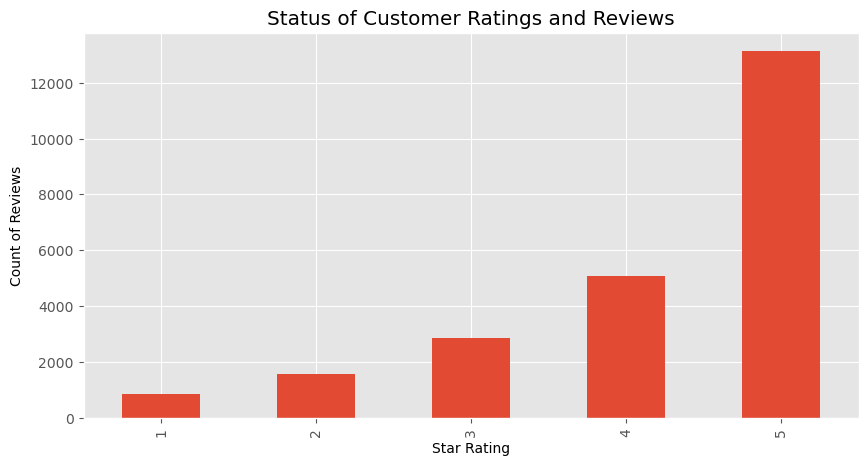

In [5]:
#Total Rating Count

print(df['Rating'].value_counts())

#Sorting and Visualization of Rating Count

ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar',
      title = 'Status of Customer Ratings and Reviews',
      figsize = (10,5))

#Giving Title to x-axis
ax.set_xlabel('Star Rating')
ax.set_ylabel('Count of Reviews')
plt.show()

## Natural Language Tool Kit Basics

In [6]:
example = df['Review_Text'][1]
print(example)

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


In [7]:
#Splitting a text into individual words or tokens

nltk.download('punkt')
tokens = word_tokenize(example)
nltk.word_tokenize(example)


#Code for limiting the token size to 10
#tokens = nltk.word_tokenize(example)
#tokens[:10]

[nltk_data] Downloading package punkt to /Users/yashoda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Love',
 'this',
 'dress',
 '!',
 'it',
 "'s",
 'sooo',
 'pretty',
 '.',
 'i',
 'happened',
 'to',
 'find',
 'it',
 'in',
 'a',
 'store',
 ',',
 'and',
 'i',
 "'m",
 'glad',
 'i',
 'did',
 'bc',
 'i',
 'never',
 'would',
 'have',
 'ordered',
 'it',
 'online',
 'bc',
 'it',
 "'s",
 'petite',
 '.',
 'i',
 'bought',
 'a',
 'petite',
 'and',
 'am',
 '5',
 "'",
 '8',
 "''",
 '.',
 'i',
 'love',
 'the',
 'length',
 'on',
 'me-',
 'hits',
 'just',
 'a',
 'little',
 'below',
 'the',
 'knee',
 '.',
 'would',
 'definitely',
 'be',
 'a',
 'true',
 'midi',
 'on',
 'someone',
 'who',
 'is',
 'truly',
 'petite',
 '.']

In [8]:
#Recognizing Part of Speech

nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

#Code for limiting tagging to 10
#tagged = nltk.pos_tag(tokens)
#tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yashoda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Love', 'VB'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('!', '.'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('sooo', 'JJ'),
 ('pretty', 'RB'),
 ('.', '.'),
 ('i', 'NN'),
 ('happened', 'VBD'),
 ('to', 'TO'),
 ('find', 'VB'),
 ('it', 'PRP'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('store', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('i', 'JJ'),
 ("'m", 'VBP'),
 ('glad', 'JJ'),
 ('i', 'NN'),
 ('did', 'VBD'),
 ('bc', 'NN'),
 ('i', 'NN'),
 ('never', 'RB'),
 ('would', 'MD'),
 ('have', 'VB'),
 ('ordered', 'VBN'),
 ('it', 'PRP'),
 ('online', 'PRP'),
 ('bc', 'VBZ'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('petite', 'JJ'),
 ('.', '.'),
 ('i', 'VB'),
 ('bought', 'VBD'),
 ('a', 'DT'),
 ('petite', 'NN'),
 ('and', 'CC'),
 ('am', 'VBP'),
 ('5', 'CD'),
 ("'", 'POS'),
 ('8', 'CD'),
 ("''", "''"),
 ('.', '.'),
 ('i', 'VB'),
 ('love', 'VBP'),
 ('the', 'DT'),
 ('length', 'NN'),
 ('on', 'IN'),
 ('me-', 'JJ'),
 ('hits', 'NNS'),
 ('just', 'RB'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('below', 'IN'),
 ('the', 'DT'),
 ('knee', 'NN'),
 ('.', '.'

In [9]:
# Identifying and labeling named entities, such as people, organizations, and locations in a text
nltk.download('maxent_ne_chunker')
nltk.download('words')
tagged = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/yashoda/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/yashoda/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  Love/VB
  this/DT
  dress/NN
  !/.
  it/PRP
  's/VBZ
  sooo/JJ
  pretty/RB
  ./.
  i/NN
  happened/VBD
  to/TO
  find/VB
  it/PRP
  in/IN
  a/DT
  store/NN
  ,/,
  and/CC
  i/JJ
  'm/VBP
  glad/JJ
  i/NN
  did/VBD
  bc/NN
  i/NN
  never/RB
  would/MD
  have/VB
  ordered/VBN
  it/PRP
  online/PRP
  bc/VBZ
  it/PRP
  's/VBZ
  petite/JJ
  ./.
  i/VB
  bought/VBD
  a/DT
  petite/NN
  and/CC
  am/VBP
  5/CD
  '/POS
  8/CD
  ''/''
  ./.
  i/VB
  love/VBP
  the/DT
  length/NN
  on/IN
  me-/JJ
  hits/NNS
  just/RB
  a/DT
  little/JJ
  below/IN
  the/DT
  knee/NN
  ./.
  would/MD
  definitely/RB
  be/VB
  a/DT
  true/JJ
  midi/NN
  on/IN
  someone/NN
  who/WP
  is/VBZ
  truly/RB
  petite/JJ
  ./.)


 # VADER Sentiment Scoring
 ## Valence Aware Dictionary and sEntiment Reasoner

### VADER sentiment scoring is a lexicon and rule-based method that assesses the sentiment of words in a text, factoring in both individual word sentiment and context. It provides scores for positive, negative, neutral sentiments, and an overall compound score.

In [10]:
#Necessary libraries

#from nltk.tokenize import word_tokenize
#from nltk.sentiment import SentimentIntensityAnalyzer
#from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

#Installing necessary upgrades if unavailable on Jupyter
!pip install --upgrade jupyter ipywidgets
!jupyter nbextension enable --py widgetsnbextension

# Create a SentimentIntensityAnalyzer instance
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yashoda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [11]:
# Example of analyzing the sentiment of a text

sia.polarity_scores("I like the product.")

{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}

In [12]:
# Example of analyzing the sentiment of a text

sia.polarity_scores("This is the worst thing ever.")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [13]:
#Running the polarity score on the entire dataset
    
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['Review_Text'])
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/23486 [00:00<?, ?it/s]

In [14]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.272,0.728,0.8932
2,0.000,0.664,0.336,0.9729
3,0.027,0.792,0.181,0.9427
4,0.226,0.340,0.434,0.5727
5,0.000,0.700,0.300,0.9291
...,...,...,...,...
23482,0.065,0.547,0.388,0.9152
23483,0.068,0.735,0.197,0.6652
23484,0.000,0.704,0.296,0.9343
23485,0.068,0.812,0.120,0.6692


In [15]:
#Merging the VADER polarity score with the dataset

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how = 'left')
vaders

,ID,neg,neu,pos,compound,Clothing_ID,Age,Review_Title,Review_Text,Rating,Division_Name,Dept_Name,Class_Name
0,1,0.000,0.272,0.728,0.8932,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates
1,2,0.000,0.664,0.336,0.9729,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
2,3,0.027,0.792,0.181,0.9427,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses
3,4,0.226,0.340,0.434,0.5727,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants
4,5,0.000,0.700,0.300,0.9291,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23482,0.065,0.547,0.388,0.9152,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,Dresses
23482,23483,0.068,0.735,0.197,0.6652,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,Knits
23483,23484,0.000,0.704,0.296,0.9343,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,Dresses
23484,23485,0.068,0.812,0.120,0.6692,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,Dresses


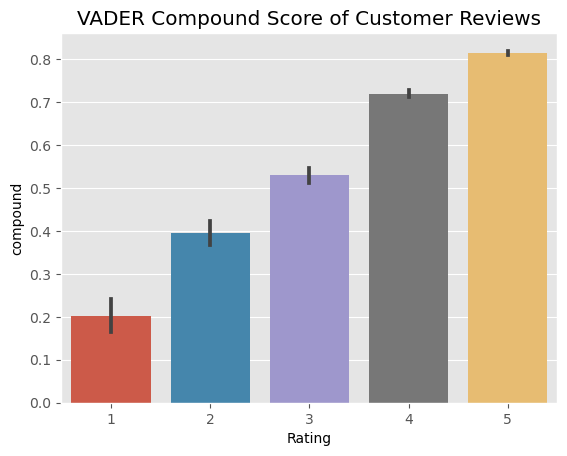

In [16]:
#Creating a barplot from the output

ax = sns.barplot(data = vaders, x ='Rating', y ='compound')
ax.set_title('VADER Compound Score of Customer Reviews')
plt.show()

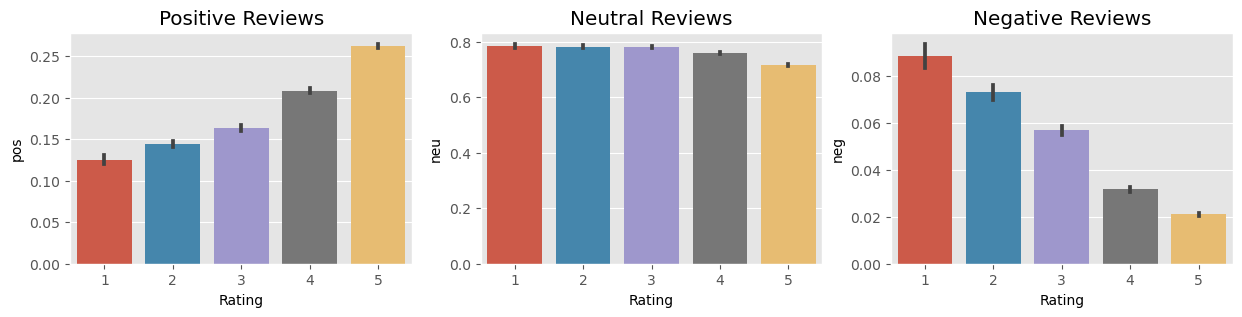

In [17]:
#Creating barplot for each polarity scores

fig, axs = plt.subplots (1, 3, figsize = (15, 3))
sns.barplot(data = vaders, x ='Rating', y ='pos', ax=axs [0])
sns.barplot(data = vaders, x ='Rating', y ='neu', ax=axs [1])
sns.barplot(data = vaders, x ='Rating', y ='neg', ax=axs [2])

axs[0].set_title('Positive Reviews')
axs[1].set_title('Neutral Reviews')
axs[2].set_title('Negative Reviews')

plt.show()

# roBERTa Model

## Robustly Optimized BERT Pretraining Approach

### roBERTa is an advanced language model that excels at understanding and analyzing text. It's based on the transformer architecture and gains its knowledge by reading extensive amounts of books and online articles.

In [18]:
#Importing necessary libraries
#from transformers import AutoTokenizer
#from transformers import AutoModelForSequenceClassification
#from scipy.special import softmax

In [19]:
#the Hugging Face Transformers library to load a pre-trained RoBERTa model

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Pull in a specific model pretrained on bunch of data for sentiment provided by Hugging Face
# Extract model weights that have been stored and do transfer learning
# No need to retrain the model

In [20]:
print(example)

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


In [21]:
#Running Roberta Model on example
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
rating = output[0][0].detach().numpy()
rating = softmax(rating)
rating_dict = {
    'roberta_neg': rating[0],
    'roberta_neu': rating[1],
    'roberta_pos': rating[2]
}
print(rating_dict)

{'roberta_neg': 0.0016088161, 'roberta_neu': 0.0074361255, 'roberta_pos': 0.99095505}


In [22]:
#Running VADER Model on example
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9729}

In [23]:
#Analyzing further for 500 dataset
df = df.head(500)
print(df.shape)

(500, 9)


In [24]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    rating = output[0][0].detach().numpy()
    rating = softmax(rating)
    rating_dict = {
        'roberta_neg': rating[0],
        'roberta_neu': rating[1],
        'roberta_pos': rating[2]
    }
    return rating_dict

In [25]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = str(row['Review_Text'])
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {f"vader_{key}": value
                               for key, value in vader_result.items()}
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Error processing for {myid}")
        
#The code runs faster if we run with GPU

  0%|          | 0/500 [00:00<?, ?it/s]

In [26]:
#VADER Sentiment Score on whole dataset 
vader_result

{'neg': 0.154, 'neu': 0.544, 'pos': 0.302, 'compound': 0.6439}

In [27]:
##roBERTa Sentiment Score on whole dataset 
roberta_result

{'roberta_neg': 0.66987234,
 'roberta_neu': 0.2642937,
 'roberta_pos': 0.06583393}

In [28]:
{**vader_result, **roberta_result}

{'neg': 0.154,
 'neu': 0.544,
 'pos': 0.302,
 'compound': 0.6439,
 'roberta_neg': 0.66987234,
 'roberta_neu': 0.2642937,
 'roberta_pos': 0.06583393}

In [29]:
both

{'vader_neg': 0.154,
 'vader_neu': 0.544,
 'vader_pos': 0.302,
 'vader_compound': 0.6439,
 'roberta_neg': 0.66987234,
 'roberta_neu': 0.2642937,
 'roberta_pos': 0.06583393}

In [30]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df, how = 'left')

In [31]:
results_df.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Clothing_ID,Age,Review_Title,Review_Text,Rating,Division_Name,Dept_Name,Class_Name
0,1,0.000,0.272,0.728,0.8932,0.002245,0.010576,0.987180,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,Intimates
1,2,0.000,0.664,0.336,0.9729,0.001609,0.007436,0.990955,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,Dresses
2,3,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,Dresses
3,4,0.226,0.340,0.434,0.5727,0.002247,0.004622,0.993131,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,Pants
4,5,0.000,0.700,0.300,0.9291,0.001239,0.006733,0.992028,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,Blouses


In [32]:
##Comparing the Scores between Models using scatter diagram

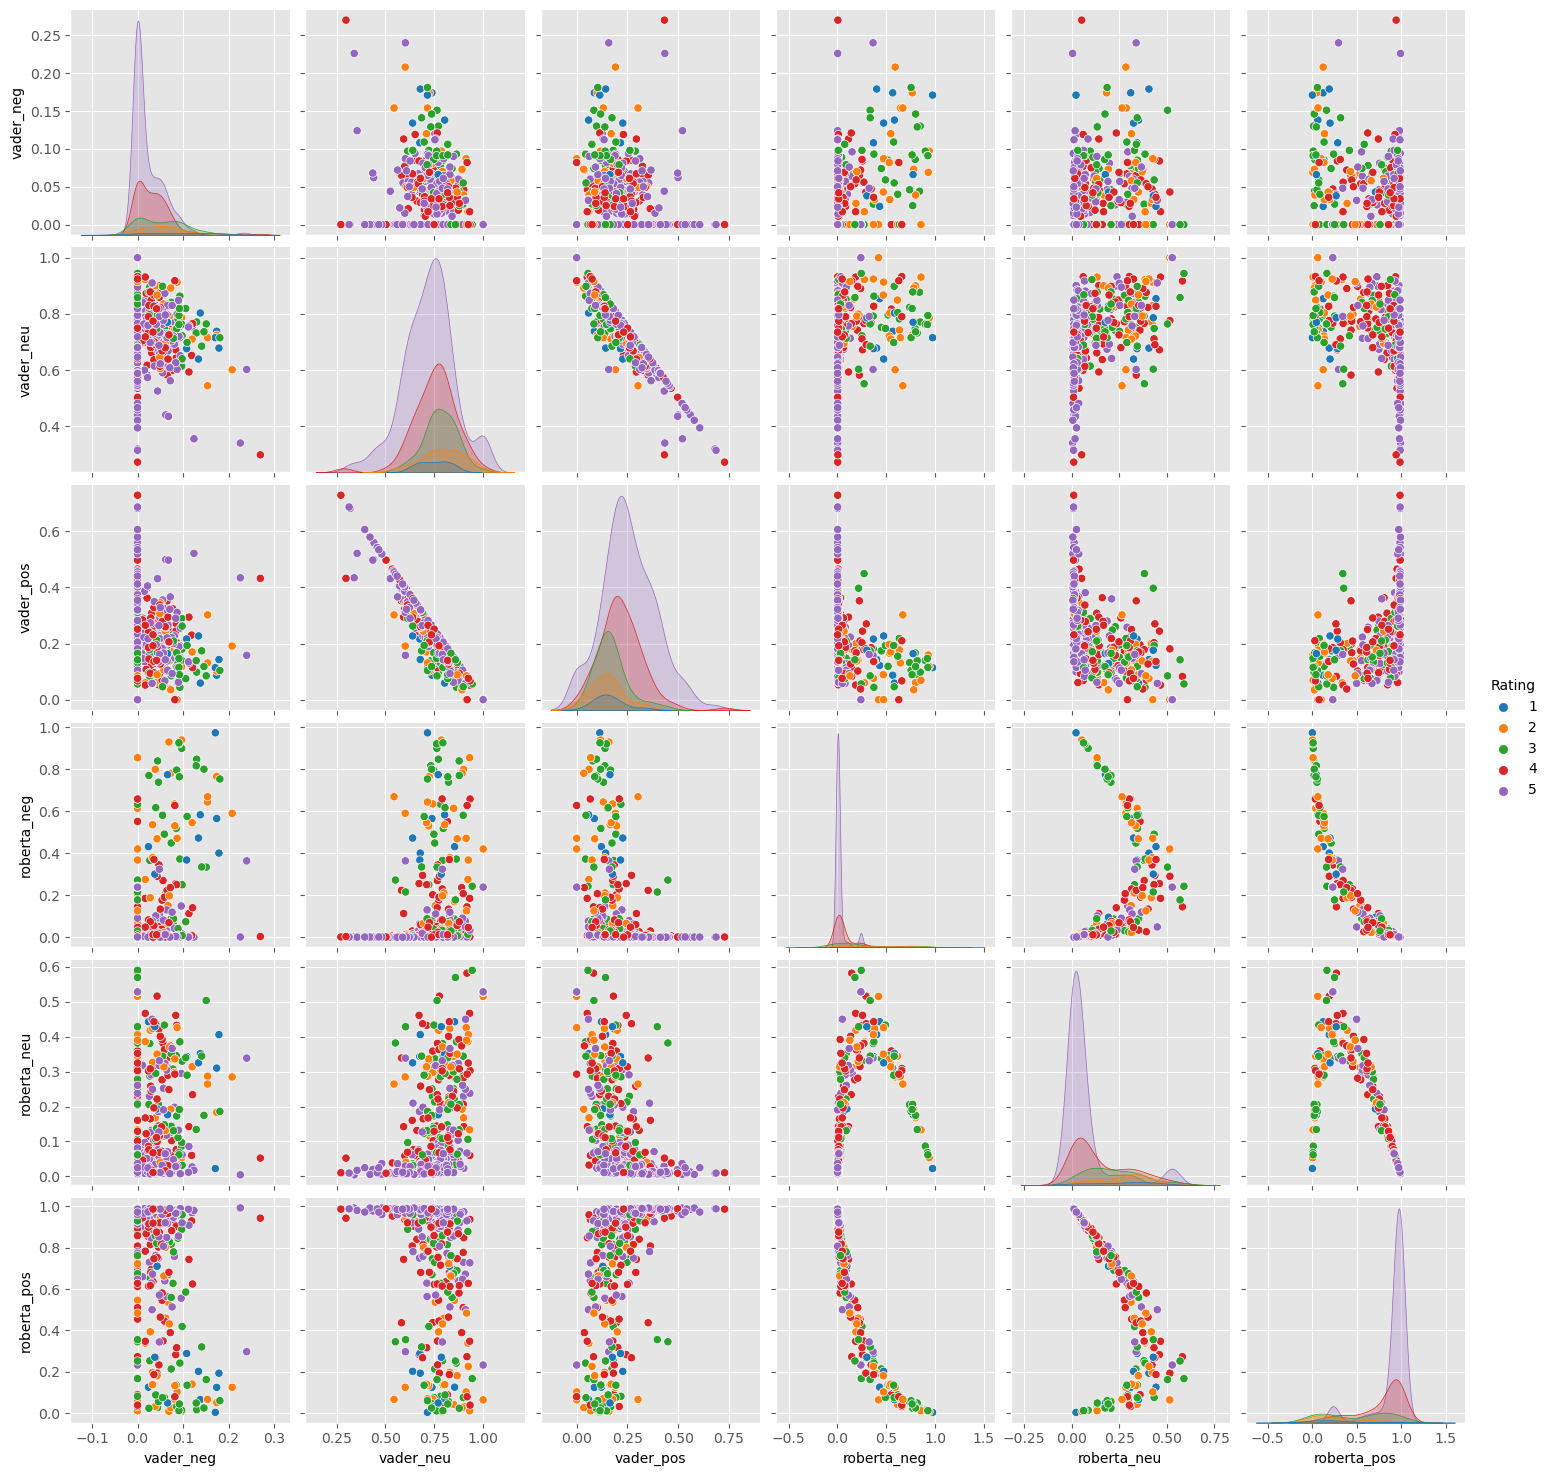

In [33]:
sns.pairplot(data = results_df,
             vars = ['vader_neg', 'vader_neu', 'vader_pos', 
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = "Rating",
            palette = "tab10")
plt.show()

### Analysis: roBERTa Model is better analyzer than the VADER model

In [34]:
#positive sentiment 1-star review

In [35]:
#Text is suppose to be positive, but rated 1 star
#roBERTa model

results_df.query('Rating == 1')\
.sort_values('roberta_pos', ascending=False)['Review_Text'].values[0]

"I was very excited to order this top in red xs. so cute, but it was huge, shapeless and support thin! it had to go back. i should've looked at other reviews."

In [36]:
#Text is suppose to be positive, but rated 1 star
#VADER model
results_df.query('Rating == 1')\
.sort_values('vader_pos', ascending=False)['Review_Text'].values[0]

"I was very excited to order this top in red xs. so cute, but it was huge, shapeless and support thin! it had to go back. i should've looked at other reviews."

In [37]:
#negative sentiment 5-star review

In [38]:
# Roberta Model
results_df.query('Rating == 5')\
.sort_values('roberta_neg', ascending=False)['Review_Text'].values[0]

'Loved the green color, the cut is super flattering, but alas, i do need hte petite, ti was a bit long and i looked a little lost. unfrotuantely, the color is sold out in petite :-('

In [39]:
#Vader Model
results_df.query('Rating == 5')\
.sort_values('vader_neg', ascending=False)['Review_Text'].values[0]

'Loved the green color, the cut is super flattering, but alas, i do need hte petite, ti was a bit long and i looked a little lost. unfrotuantely, the color is sold out in petite :-('